# Notebook 3 - Working with WMS Services in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth.  

# Overview

This notebook will present how data obtained from WMS services can be loaded into GemGIS with the [OWSLib](https://geopython.github.io/OWSLib/) package and how it can be manipulated for the usage in [GemPy](https://github.com/cgre-aachen/gempy).

<div class="alert alert-block alert-warning">
<b>NB:</b> A WMS Service does only contain image data and no real data such as the elevation stored in a DEM. For this reason, WCS Services need to be employed, which will be introduced in a later tutorial.
</div>

- [What is a WMS Service?](#wms)
- [What is OWSLib?](#owslib)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)

- [Example 1 - Loading a WMS Service](#ex1)
- [Example 2 - Downloading data from a WMS Service](#ex2)
- [Further Use](#ex3)


<a id='wms'></a>
## What is a WMS Service?

A Web Map Service (WMS) is a standard protocol developed by the Open Geospatial Consortium in 1999 for serving georeferenced map images over the Internet. These images are typically produced by a map server from data provided by a GIS database.

WMS defines a standard method of publishing capabilities to the web and furnishing images of requested areas. A WMS client first asks what layers are available, in what formats, styles, and projections. Some decisions are made depending on need and availability. These decisions along with a specific bounding box are sent back to the WMS server. The WMS server builds the requested image and returns it as a rectangular png, jpeg, tiff etc. Behind the WMS server is some type of data repository, either vector data or imagery, but the WMS server handles all requests for specific parts of this data resource. 

<img src="../data/Images/wms.jpg" width=500>

Sources: https://en.wikipedia.org/wiki/Web_Map_Service, http://www.web-maps.com/gisblog/?cat=19

<a id='owslib'></a>
## What is OWSLib?

[OWSLib](https://geopython.github.io/OWSLib/) is a Python package for client programming with Open Geospatial Consortium (OGC) web service (hence OWS) interface standards, and their related content models. OWSLib provides a common API for accessing service metadata and wrappers for numerous OGC Web Service interfaces.

For more information see: https://geopython.github.io/OWSLib/

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image Source: https://www.geolstuffmnl.com/post/measuring-strike-and-dip

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `misc.py` - file containing functions for custom tasks 



If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. # A notebook about how to work with WMS Services will follow soon

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class in later tutorials, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8.0 is the latest stable version that is supported by GemGIS***. Rasterio objects and a general introduction to working with raster in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Mon Oct 12 21:59:53 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.0.5
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.6
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.2
--------------------------------------------------------------------------------

<a id='ex1'></a>
# Example 1 - Loading a WMS Service

A WMS or We Map Service is an online service storing spatial data such as DEMs, satellite data or polygons of geological maps. They can be accessed via an URL and can be loaded into GemGIS. As an example, WMS services provided by https://www.terrestris.de/en/openstreetmap-wms/ are loaded into GemGIS. The WMS Service is loaded as `owslib.map.wms111.WebMapService_1_1_1`.

In [3]:
wms = gg.wms.load('https://ows.terrestris.de/osm/service?')
type(wms)

owslib.map.wms111.WebMapService_1_1_1

## Inspecting the WMS Services

The WMS service object has several attributes that can be inspected. For more information see: https://geopython.github.io/OWSLib/#wms

In [4]:
wms.version

'1.1.1'

In [5]:
# The different layers of this service
list(wms.contents)

['OSM-WMS',
 'OSM-Overlay-WMS',
 'TOPO-WMS',
 'TOPO-OSM-WMS',
 'SRTM30-Hillshade',
 'SRTM30-Colored',
 'SRTM30-Colored-Hillshade',
 'SRTM30-Contour']

In [6]:
wms.identification.type

'OGC:WMS'

In [7]:
wms.identification.version

'1.1.1'

In [8]:
wms.identification.title

'OpenStreetMap WMS'

In [9]:
wms.identification.abstract

'OpenStreetMap WMS, bereitgestellt durch terrestris GmbH und Co. KG. Beschleunigt mit MapProxy (http://mapproxy.org/)'

In [10]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get', 'url': 'http://ows.terrestris.de/osm/service?'}]

In [11]:
# The different formats a layer can be saved as
wms.getOperationByName('GetMap').formatOptions

['image/jpeg', 'image/png']

In [12]:
# Title of a layer
wms['OSM-WMS'].title

'OpenStreetMap WMS - by terrestris'

In [13]:
# Available CRS systems for a layer
wms['OSM-WMS'].crsOptions

['EPSG:25833',
 'EPSG:3857',
 'EPSG:29192',
 'EPSG:4674',
 'EPSG:31466',
 'EPSG:21781',
 'EPSG:4647',
 'EPSG:25832',
 'EPSG:3034',
 'EPSG:900913',
 'EPSG:3068',
 'EPSG:32648',
 'EPSG:31468',
 'EPSG:2056',
 'EPSG:2180',
 'EPSG:4686',
 'EPSG:4326',
 'EPSG:31463',
 'EPSG:5243',
 'EPSG:3035',
 'EPSG:4258',
 'EPSG:31467',
 'EPSG:2100',
 'EPSG:29193',
 'EPSG:4839']

In [14]:
# Available styles
wms['OSM-WMS'].styles

{'default': {'title': 'default',
  'legend': 'http://ows.terrestris.de/osm/service?styles=&layer=OSM-WMS&service=WMS&format=image%2Fpng&sld_version=1.1.0&request=GetLegendGraphic&version=1.1.1'}}

In [15]:
wms['OSM-WMS'].boundingBox

(-20037508.3428, -25819498.5135, 20037508.3428, 25819498.5135, 'EPSG:900913')

In [16]:
wms['OSM-WMS'].boundingBoxWGS84

(-180.0, -88.0, 180.0, 88.0)

In [17]:
wms['OSM-WMS'].opaque

0

In [18]:
wms['OSM-WMS'].queryable

1

<a id='ex2'></a>
# Example 2 - Downloading data from a WMS Service

Data from a WMS service can be loaded by providing different arguments that are needed to request the data. These include:

* URL
* Layer Name
* Style
* CRS
* Extent (with coordinates corresponding to the provided CRS) - the extent was chosen to cover a working area around Aachen
* Size in Pixels (which defines resolution)
* Format

As `GemGIS`is developed at RWTH Aachen University, WMS Data from the Aachen Area will be displayed

## Load Data as OWSLib Map

Data can be loaded as owslib map with `gg.wms.load_as_map(...)`. However, this object is not easily usable. So, we have to convert the object to a NumPy array.

In [19]:
wms_map = gg.wms.load_as_map('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [4200, 2800], 'image/png')
type(wms_map)

owslib.util.ResponseWrapper

## Load Data as Array

In order to make the data usable, the data can be downloaded as array with `gg.wms.load_as_array(...)`. Here, we are downloading a standard OpenStreetMap Map.

In [20]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [4200, 2800], 'image/png')


## Plot Data
As the data is downloaded as `np.ndarray`, it can easily be plotted with `plt.imshow(...)`.

Text(32294500, 5629750, 'Aachen')

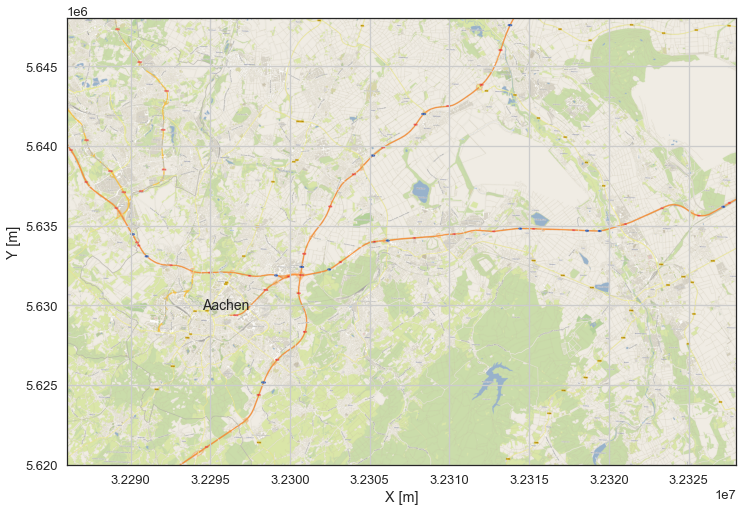

In [21]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

## Load Digital Elevation Model
The digital elevation model (SRTM30) is provided with a resolution of 30 m. It is therefore recommended to adapt the size of the image in pixels to this resolution. In this case, the size would be 1400 px by 933 px.

In [22]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'SRTM30-Colored', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400, 933], 'image/png')


Text(32294500, 5629750, 'Aachen')

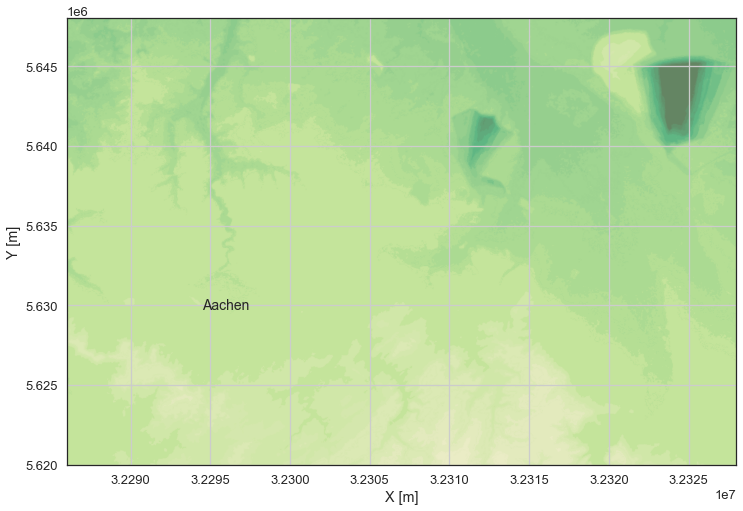

In [23]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

In [24]:
wms_map[:, :, 0].shape

(933, 1400)

## Load Hillshades

In [25]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'SRTM30-Colored-Hillshade', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

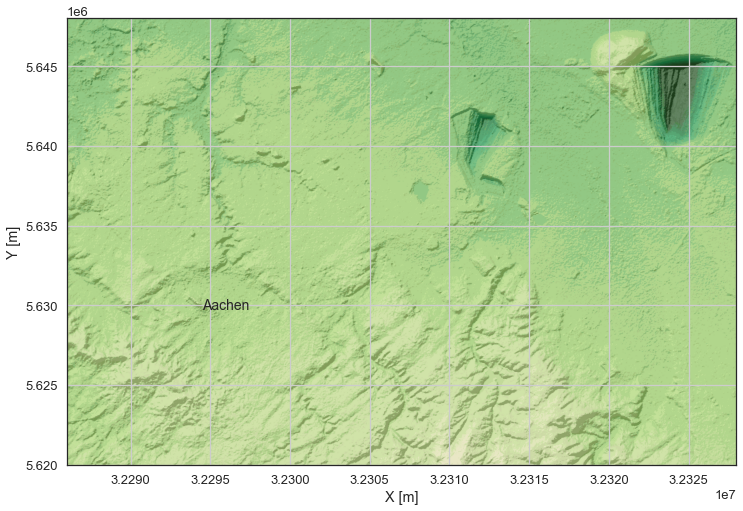

In [26]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

## Load Contours

In [27]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'SRTM30-Contour', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

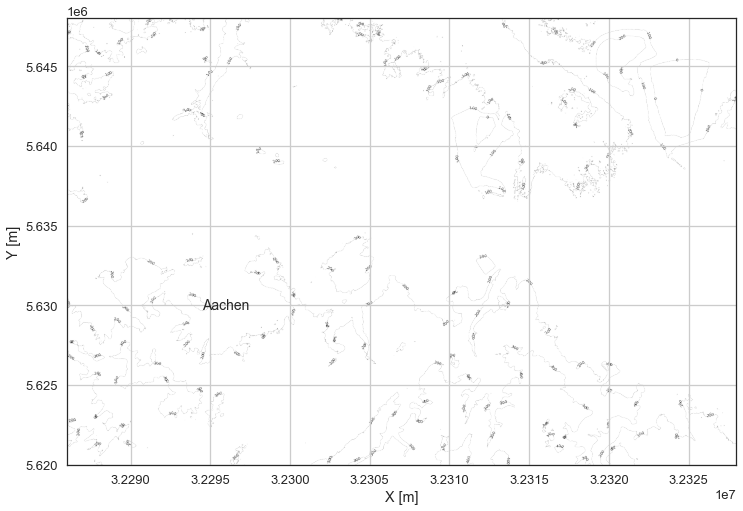

In [28]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

## Load Open Streat Map Overlay

In [29]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-Overlay-WMS', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

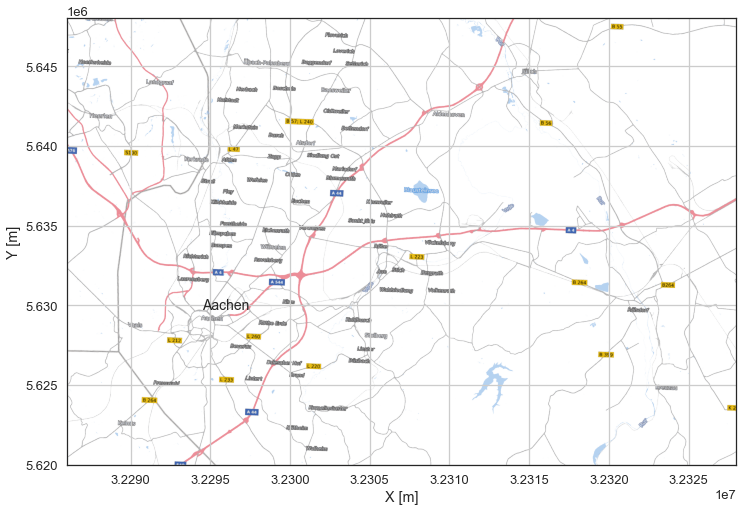

In [30]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

## Load Orthophotos of North Rhine Westfalia

WMS Services may also be provided by local governments or geological surveys. Here, we will have a look at orthophotos provided by the state of North Rhine Westfalia, Germany (https://www.bezreg-koeln.nrw.de/brk_internet/geobasis/webdienste/geodatendienste/).

In [31]:
nrw = gg.wms.load('https://www.wms.nrw.de/geobasis/wms_nw_dop')
list(nrw.contents)

['WMS_NW_DOP', 'nw_dop_utm_info', 'nw_dop_rgb', 'nw_dop_cir', 'nw_dop_nir']

In [32]:
nrw['WMS_NW_DOP'].crsOptions

['EPSG:5653',
 'EPSG:3857',
 'EPSG:25833',
 'EPSG:25831',
 'EPSG:31466',
 'EPSG:5650',
 'EPSG:4647',
 'EPSG:28992',
 'EPSG:25832',
 'EPSG:3034',
 'EPSG:3045',
 'EPSG:5649',
 'EPSG:4326',
 'EPSG:3043',
 'EPSG:5652',
 'EPSG:3035',
 'EPSG:4258',
 'EPSG:31467',
 'EPSG:3044',
 'EPSG:5651']

In [33]:
wms_map = gg.wms.load_as_array('https://www.wms.nrw.de/geobasis/wms_nw_dop',
                             'nw_dop_rgb', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

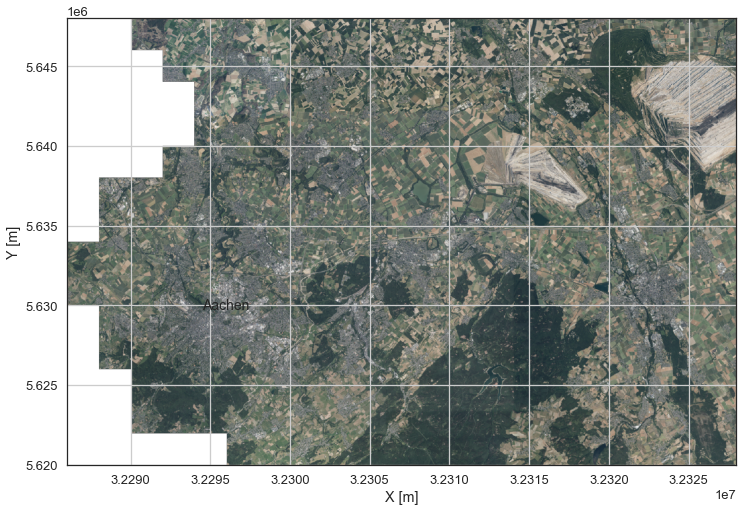

In [34]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

# Load Geological Map

In [35]:
nrw = gg.wms.load('http://www.wms.nrw.de/gd/GK100')
list(nrw.contents)

['0', '1', '2']

In [36]:
nrw['0'].crsOptions

['EPSG:5653',
 'EPSG:3857',
 'EPSG:25833',
 'EPSG:25831',
 'EPSG:31466',
 'EPSG:5650',
 'EPSG:4647',
 'EPSG:25832',
 'EPSG:3034',
 'EPSG:3045',
 'EPSG:5649',
 'EPSG:102362',
 'EPSG:4326',
 'EPSG:102100',
 'EPSG:31463',
 'EPSG:3043',
 'EPSG:5652',
 'EPSG:3035',
 'EPSG:4258',
 'EPSG:31462',
 'EPSG:31467',
 'EPSG:3044',
 'EPSG:5651']

In [37]:
wms_map = gg.wms.load_as_array('http://www.wms.nrw.de/gd/GK100',
                             '0', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

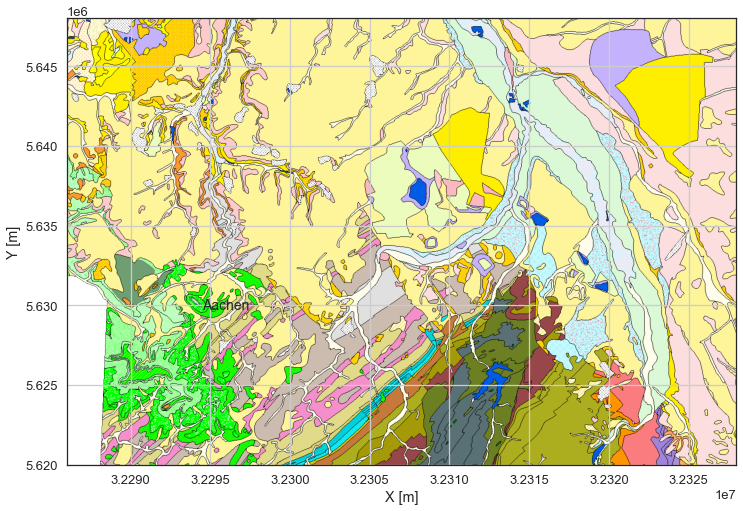

In [38]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

In [39]:
wms_map = gg.wms.load_as_array('http://www.wms.nrw.de/gd/GK100',
                             '1', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

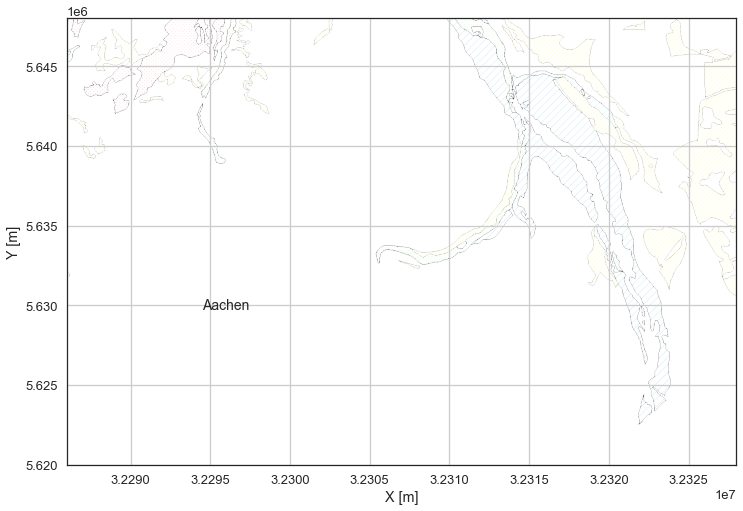

In [40]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

In [41]:
wms_map = gg.wms.load_as_array('http://www.wms.nrw.de/gd/GK100',
                             '2', 'default', 'EPSG:4647', [32286000, 32328000,5620000,5648000], [1400,933], 'image/png')


Text(32294500, 5629750, 'Aachen')

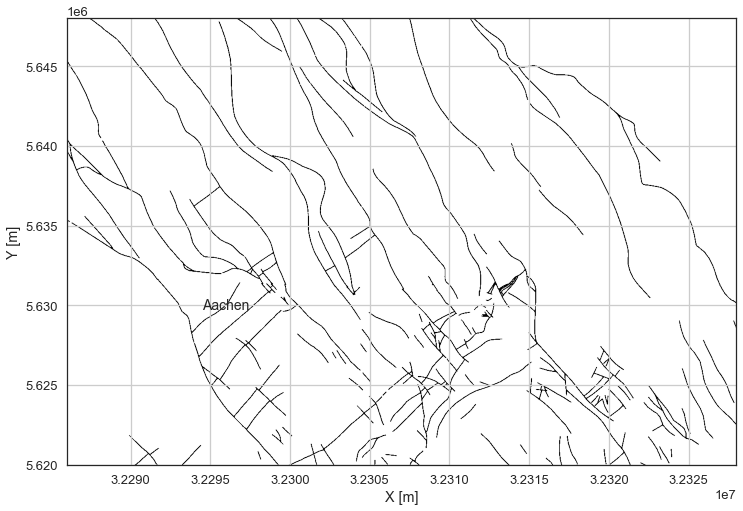

In [42]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32286000, 32328000,5620000,5648000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

<a id='ex3'></a>

# Further Use

**What can WMS Layers be used for?**

* Extracted array can further be processed with methods of `gg.raster`
* Data can be used as basemap to plot spatial data
* DEM data can be used as input for topography in `GemPy`
* In a later version of `GemGIS`, it will be possible to digitize interfaces and orientations from maps
* In a later version of `GemGIS`, Web Coverage Services (WCS) and Web Feature Services (WFS) will also be support allowing to convert the downloaded data into shape files (for WFS). 
* ....

# Reporting your Python environment's package versions and hardware resources

In [43]:
import scooby

In [44]:
scooby.Report(additional=[gpd, rasterio, gg])

--------------------------------------------------------------------------------
  Date: Mon Oct 12 22:00:22 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

         geopandas : 0.8.1
          rasterio : 1.1.6
            gemgis : 0.1.2
             numpy : 1.19.1
             scipy : 1.5.2
           IPython : 7.18.1
        matplotlib : 3.3.2
            scooby : 0.5.6
--------------------------------------------------------------------------------